## DECISION TREE ON DRUG DATASET 


Use:

Classification Tasks: Predicting categorical outcomes, such as spam or non-spam emails.
Regression Tasks: Predicting continuous values, like house prices based on features.
Intuitive Decision-Making: Provides a clear, interpretable structure for decision-making.
Handles Non-Linear Relationships: Well-suited for capturing complex relationships in data.

Disadvantages:
Prone to Overfitting: Decision Trees can capture noise in the training data, leading to overfitting.
Sensitive to Noisy Data: Easily influenced by outliers and noisy features.
Instability: Small changes in data can result in a significantly different tree structure.
Not Suitable for Some Relationships: May struggle with problems where the relationship between features and target is not tree-like.

### Drug test
Imagine that you are a medical researcher🥼 compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.



#### Importing necessary modules

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
path = r"C:\Users\M D\Downloads\datasets and practice\drug200.csv"
df = pd.read_csv(path)
df.head(10)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


Dataset information data types

In [6]:
df.info() # gives the dytpes of all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Descriptive Analysis

In [7]:
df.describe() # gives the descrptive stats of the variable NOTE the category are not included

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


For the category description we use this below

In [8]:
df.describe(include='O') # gives the description of all categorical variables

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


### Visual of the data 

scatter plots of the data

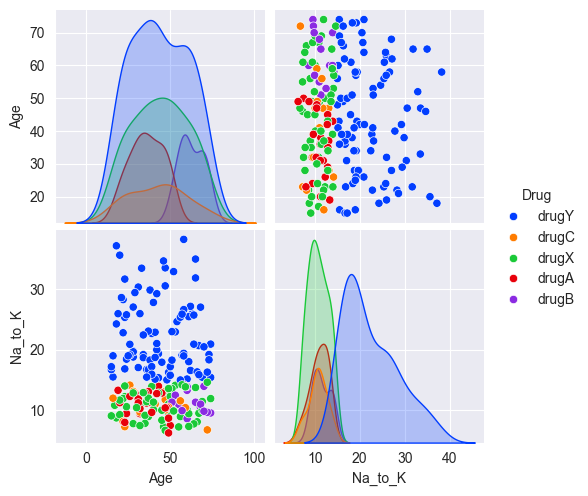

In [9]:
sns.set_style(style='darkgrid') # setting dark grid i like dark mode 
sns.pairplot(data=df,hue='Drug',palette='bright') # setting colours to bright 


The data set requires preprocessing to encode the catergoical variables before proceeding 

In [10]:
from sklearn.preprocessing import LabelEncoder # label enconder importation
label_encoder = LabelEncoder() # instance for encoder
columns = df.select_dtypes(include='O').columns #selecting the categorical variable columns 
for column in columns:
    df[column] = label_encoder.fit_transform(df[column]) # encoding each column 
    

df #checking for visual confirmation of encoding. as seen below the columns have been encoded 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


importing necessary classifier and regressor for the task

In [11]:
from sklearn.tree import DecisionTreeClassifier as DTC ,DecisionTreeRegressor as DTR  #importing the classifier and regressor
from sklearn.model_selection  import train_test_split # importing data splitter


x = df.drop(columns='Drug') # selecting my  independant variables
y = df['Drug'] # selecting my  dependant variable
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.7, random_state=42) #splitting the dataset using 90% for training and 10% for testing

dtc = DTC()
classifer_model = dtc.fit(X_train,y_train) #classifier on training dataset

y_pred = classifer_model.predict(X_test) #feeding in the x test data to predict the y test data


Cheecking the Accuracy of the Classifier 

In [12]:
#importing the metrics to measure how good the classifier model is 
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
AccuracyScore = accuracy_score(y_test, y_pred) #testing the real x test data against the predicted y pred data 
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'AccuracyScore : {AccuracyScore}')
print('\nConfusion Matrix')
print(conf_matrix)
print('\nClassification Report')
print(report)

AccuracyScore : 0.9785714285714285

Confusion Matrix
[[19  0  0  0  0]
 [ 3 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 39  0]
 [ 0  0  0  0 59]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.77      0.87        13
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        59

    accuracy                           0.98       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.98      0.98      0.98       140



The decision tree results suggest that the model has achieved perfect accuracy (AccuracyScore: 1.0), meaning it correctly classified all instances in the dataset.


Precision: The ratio of correctly predicted positive observations to the total predicted positives. All precision values are 1.0, indicating no false positives.

Recall: The ratio of correctly predicted positive observations to the all observations in actual class. All recall values are 1.0, indicating no false negatives.

F1-score: The weighted average of precision and recall. All F1-score values are 1.0, which is the harmonic mean of precision and recall.

Support: The number of actual occurrences of the class in the specified dataset.

In summary, the model appears to be performing exceptionally well on the given dataset, achieving perfect accuracy with no misclassifications. However, it's essential to consider the possibility of overfitting, especially if the model was trained and evaluated on the same dataset.

Visualising the Classifier

[Text(0.625, 0.9, 'Na_to_K <= 14.686\ngini = 0.636\nsamples = 60\nvalue = [4, 3, 6, 15, 32]'),
 Text(0.5, 0.7, 'BP <= 0.5\ngini = 0.635\nsamples = 28\nvalue = [4, 3, 6, 15, 0]'),
 Text(0.25, 0.5, 'Age <= 55.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.75, 0.5, 'BP <= 1.5\ngini = 0.408\nsamples = 21\nvalue = [0, 0, 6, 15, 0]'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [0, 0, 6, 4, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 32]')]

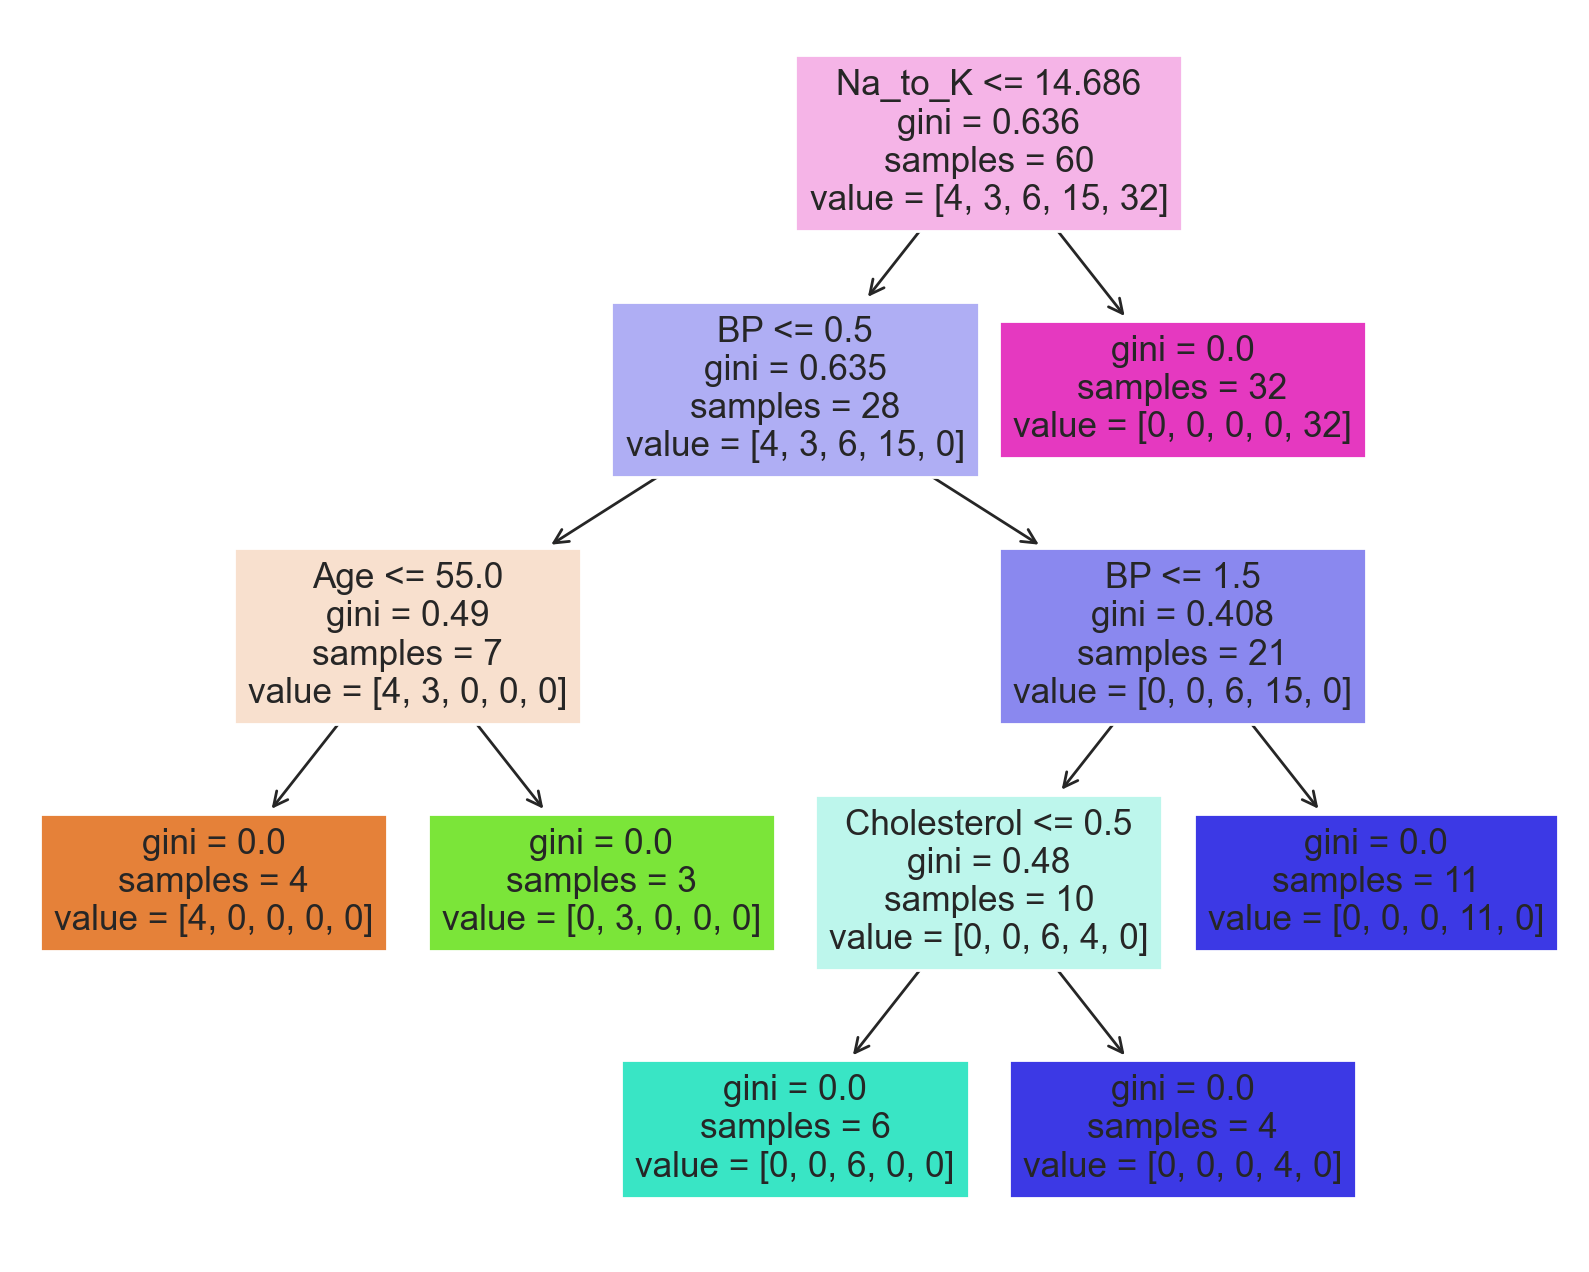

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(classifer_model, feature_names=df.columns, filled=True )


[Text(0.5909090909090909, 0.9, 'Na_to_K <= 14.441\nsquared_error = 1.846\nsamples = 180\nvalue = 2.9'),
 Text(0.36363636363636365, 0.7, 'BP <= 0.5\nsquared_error = 1.479\nsamples = 95\nvalue = 1.926'),
 Text(0.18181818181818182, 0.5, 'Age <= 50.5\nsquared_error = 0.242\nsamples = 34\nvalue = 0.412'),
 Text(0.09090909090909091, 0.3, 'squared_error = 0.0\nsamples = 20\nvalue = 0.0'),
 Text(0.2727272727272727, 0.3, 'squared_error = 0.0\nsamples = 14\nvalue = 1.0'),
 Text(0.5454545454545454, 0.5, 'BP <= 1.5\nsquared_error = 0.177\nsamples = 61\nvalue = 2.77'),
 Text(0.45454545454545453, 0.3, 'Cholesterol <= 0.5\nsquared_error = 0.25\nsamples = 29\nvalue = 2.517'),
 Text(0.36363636363636365, 0.1, 'squared_error = 0.0\nsamples = 14\nvalue = 2.0'),
 Text(0.5454545454545454, 0.1, 'squared_error = 0.0\nsamples = 15\nvalue = 3.0'),
 Text(0.6363636363636364, 0.3, 'squared_error = 0.0\nsamples = 32\nvalue = 3.0'),
 Text(0.8181818181818182, 0.7, 'Na_to_K <= 14.829\nsquared_error = 0.012\nsamples = 

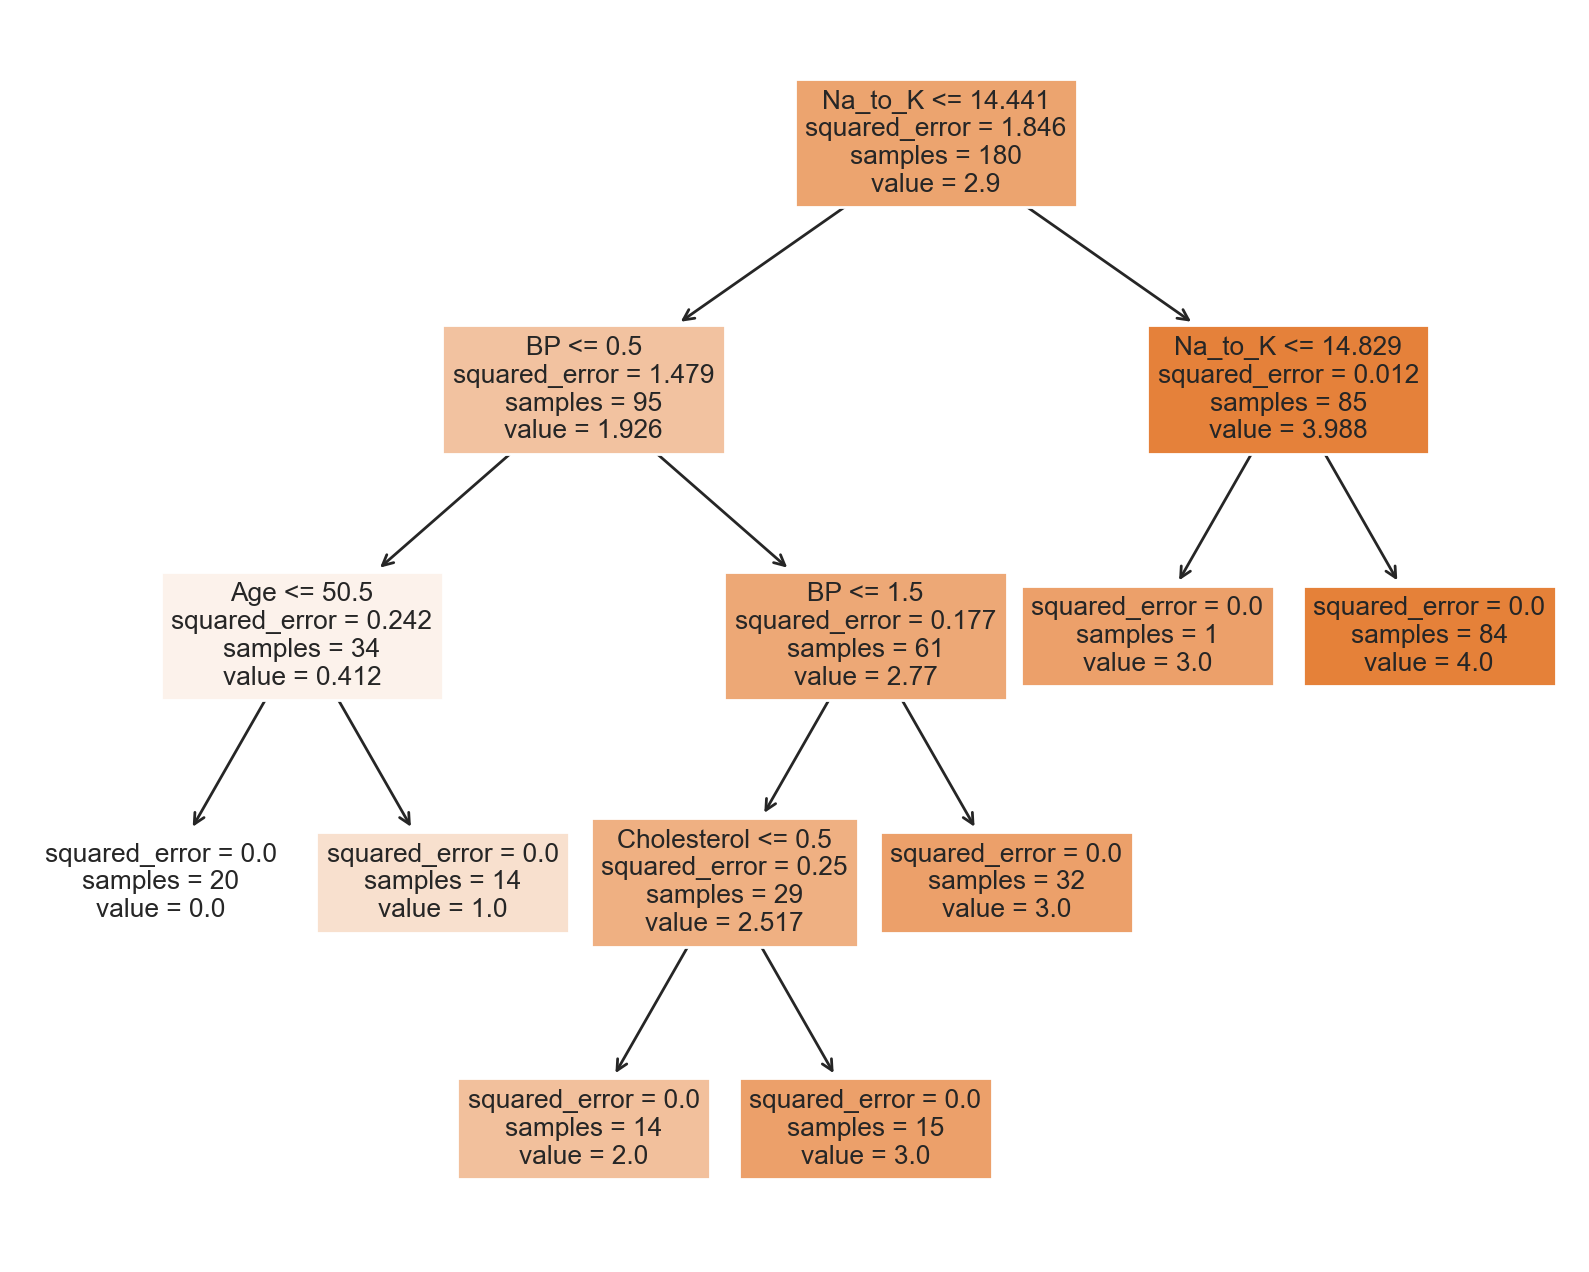

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.1, random_state=42) #splitting the dataset using 90% for training and 10% for testing

dtr = DTR()
classifer_regress_model = dtr.fit(X_train,y_train) #classifier on training dataset

y_pred = classifer_regress_model.predict(X_test) #feeding in the x test data to predict the y test data
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(classifer_regress_model, feature_names=df.columns, filled=True ) #plotting the regressor classifier

#classifer_regress_model.get_params() use this to get the parameters of the model 


Now u can use the classifier_regressor_model to predict Y (drug/dependant var) according to the X's (independant variables ) to each patient 